# Coding Assignment - "ML Basics"

## 1. Preparation

In [1]:
import numpy as np 
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

## 2. Data

### 2.1 Dataset

In [2]:
# Import the weather measurements.
data = pd.read_csv('Assignment_MLBasicsData.csv')

# We consider each temperature measurement (=a row in dataframe data) 
# as a separate data point.
# Determine the total number of data points stored in csv file.
nrdatapoints = len(data)

# Print out the first data point (first row).
print("First data point:")
print(data.iloc[0])
print("\n******************************\n")

# Here is another data point. 
print("Another data point:")
print(data.iloc[13])
print("\n******************************\n")

# We use normalized values of 
# latitude, longitude, year, mon, day, hour, minute (as float values) 
# as features of a data point.
nrfeatures = 7 

# The code snippet below extracts the features of the first data point (first row in dataframe data).
date_object = datetime.strptime(data['Timestamp'].iloc[0], '%Y-%m-%d %H:%M:%S')

# Extract individual components.
latitude = data["Latitude"].iloc[0]
longitude = data["Longitude"].iloc[0]
year = float(date_object.year)
month = float(date_object.month)
day = float(date_object.day)
hour = float(date_object.hour)
minute = float(date_object.minute)

print("Unnormalized features of the first data point: ")
print(f"Latitude: {latitude}")
print(f"Longitude: {longitude}")
print(f"Year: {year}")
print(f"Month: {month}")
print(f"Day: {day}")
print(f"Hour: {hour}")
print(f"Minute: {minute}")
print("\n******************************\n")

print("Normalized features of the first data point: ")
print(f"Latitude: {latitude/100}")
print(f"Longitude: {longitude/100}")
print(f"Year: {year/2025}")
print(f"Month: {month/13}")
print(f"Day: {day/32}")
print(f"Hour: {hour/25}")
print(f"Minute: {minute/61}")
print("\n******************************\n")

# We choose the temperature as the label (quantity of interest) of a data point.
print("Label of the first data point:", data["temp"].iloc[0])

First data point:
Latitude                        69.04277
Longitude                       20.85091
Timestamp            2023-12-31 18:00:00
temp                               -16.5
name         Enontekiö Kilpisjärvi Saana
Name: 0, dtype: object

******************************

Another data point:
Latitude                     69.757
Longitude                    27.012
Timestamp       2023-12-31 13:00:00
temp                          -26.3
name         Utsjoki Kevo Kevojärvi
Name: 13, dtype: object

******************************

Unnormalized features of the first data point: 
Latitude: 69.04277
Longitude: 20.85091
Year: 2023.0
Month: 12.0
Day: 31.0
Hour: 18.0
Minute: 0.0

******************************

Normalized features of the first data point: 
Latitude: 0.6904277000000001
Longitude: 0.2085091
Year: 0.9990123456790123
Month: 0.9230769230769231
Day: 0.96875
Hour: 0.72
Minute: 0.0

******************************

Label of the first data point: -16.5


### 2.2 Features and labels

In [3]:
# We next build the feature matrix X (each of its rows hold the features of a data point) 
# and the label vector y (whose entries hold the labels of data points).
X = np.zeros((nrdatapoints, nrfeatures))
y = np.zeros((nrdatapoints, 1))

# Iterate over all rows in dataframe and create corresponding feature vector and label. 
for ind in data.index:
    # Latitude of FMI station, normalized by 100. 
    lat = float(data['Latitude'].iloc[ind]) / 100
    
    # Longitude of FMI station, normalized by 100.
    lon = float(data['Longitude'].iloc[ind]) / 100
    
    # Exctract the temperature value.
    tmp = data['temp'].iloc[ind]
    
    # Read the date and time of the temperature measurement.
    date_object = datetime.strptime(data['Timestamp'].iloc[ind], '%Y-%m-%d %H:%M:%S')

    # Extract year, month, day, hour, minute, and second. 
    # Normalize these values to ensure features are in range [0,1].
    year = float(date_object.year) / 2025
    month = float(date_object.month) / 13
    day = float(date_object.day) / 32
    hour = float(date_object.hour) / 25
    minute = float(date_object.minute) / 61
    
    # Store the data point's features and a label.
    X[ind,:] = [lat, lon, year, month, day, hour, minute]
    y[ind,:] = tmp

print(f"The created feature matrix contains {np.shape(X)[0]} entries of {np.shape(X)[1]} features each.")
print(f"The created label vector contains {np.shape(y)[0]} measurements.")

The created feature matrix contains 19768 entries of 7 features each.
The created label vector contains 19768 measurements.


### 2.3 Training and validation sets

In [4]:
# Define the number of data points used for training set.
trainsize = 100

# Split the dataset into training and validation set. 
Xtrain = X[:trainsize,:] 
Xval = X[trainsize:] 
ytrain = y[:trainsize] 
yval = y[trainsize:] 

print(f"The training set consists of {np.shape(Xtrain)[0]} data points.")
print(f"The validation set consists of {np.shape(Xval)[0]} data points.")

The training set consists of 100 data points.
The validation set consists of 19668 data points.


## 3. Model

### 3.1 Student task #1 - Linear regression

In [5]:
####################TODO####################
# TODO: Train a linear model, using the LinearRegression class of the scikit-learn package, 
#       on the training set and determine the resulting training and validation errors.

# raise NotImplementedError
# Etrain = 
# Eval =

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()
linear_model.fit(Xtrain, ytrain)

ytrain_pred = linear_model.predict(Xtrain)
yval_pred = linear_model.predict(Xval)

Etrain = mean_squared_error(ytrain, ytrain_pred)
Eval = mean_squared_error(yval, yval_pred)

print("\n*************** Linear Regression Diagnosis ***************")
print("Training error:", Etrain)
print("Validation error:", Eval)


*************** Linear Regression Diagnosis ***************
Training error: 17.082721305711885
Validation error: 18.25410763805204


### 3.2 Student task #2 - Polynomial features

degree: 1
Xtrain: (100, 7)
Xtrain_poly: (100, 8)
Xval: (19668, 7)
Xval_poly: (19668, 8)
degree: 2
Xtrain: (100, 7)
Xtrain_poly: (100, 36)
Xval: (19668, 7)
Xval_poly: (19668, 36)
degree: 3
Xtrain: (100, 7)
Xtrain_poly: (100, 120)
Xval: (19668, 7)
Xval_poly: (19668, 120)


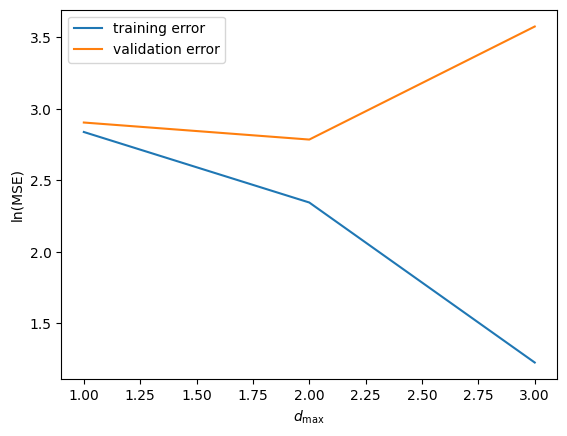

In [10]:
# Define the polynomial degrees.
maxdegreevals = [1, 2, 3]

####################TODO####################
# TODO: Train and validate a linear model for different choices for the maximal
#       polynomial degree used.
#       Store the obtained training and validation errors for plotting. 

# raise NotImplementedError
# trainerr = 
# valerr = 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

trainerr = []
valerr = []

for degree in maxdegreevals:
    # Generate polynomial features
    poly = PolynomialFeatures(degree=degree)
    Xtrain_poly = poly.fit_transform(Xtrain)
    Xval_poly = poly.transform(Xval)
    print(f"degree: {degree}")
    print(f"Xtrain: {Xtrain.shape}")
    print(f"Xtrain_poly: {Xtrain_poly.shape}")
    print(f"Xval: {Xval.shape}")
    print(f"Xval_poly: {Xval_poly.shape}")
    
    # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(Xtrain_poly, ytrain.ravel())  # Ensure ytrain is a 1D array
    
    # Predict on training and validation sets
    ytrain_pred = model.predict(Xtrain_poly)
    yval_pred = model.predict(Xval_poly)
    
    # Compute MSE for training and validation sets
    train_mse = mean_squared_error(ytrain, ytrain_pred)
    val_mse = mean_squared_error(yval, yval_pred)
    
    # Store ln(MSE) for plotting
    trainerr.append(np.log(train_mse))
    valerr.append(np.log(val_mse))


# Plot the training and validation errors.
# plt.plot(maxdegreevals, np.hstack([trainerr, valerr]))

plt.plot(maxdegreevals, trainerr, label="Training error")
plt.plot(maxdegreevals, valerr, label="Validation error")
plt.legend(["training error","validation error"])
plt.xlabel(r'$d_{\rm max}$')
plt.ylabel('ln(MSE)')
plt.show()

### 3.3 Student task #3 - Ridge regression

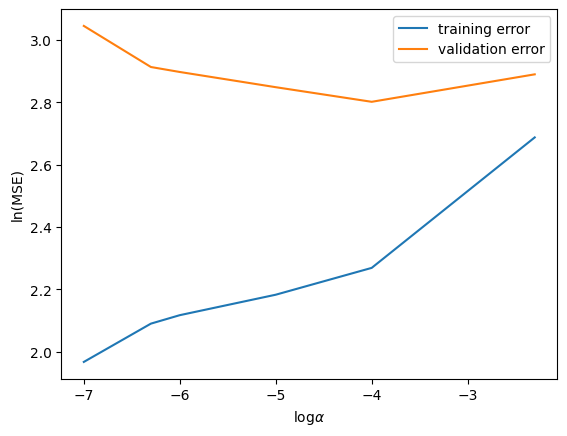

In [7]:
# Values for the GTVMin (Generalized Total Variation minimization) parameter alpha.

GTVmin_parameter = np.array([1e-9, 5e-9, 1e-8, 1e-7,1e-6,5e-5]) 

# The input paramter 'alpha' for RidgeRegression class requires a scaling by the samplesize.
alphavals = GTVmin_parameter * trainsize

# In scikit-Learn, the alpha parameter is equal to m * alpha (in lecture notes E.q 2.25), where m is the number of training size.

# The maximal degree of polynomial combinations of original features used to create more features.
poly_degree = 3

####################TODO####################
# TODO: Using a fixed value for the polynomial degree for the feature augmentation step, 
#       train and validate a linear model using ridge regression (2.22) via the Ridge class. 
#       For each choice of alpha in (2.22), determine the resulting training and validation errors.

# raise NotImplementedError
# trainerr = 
# valerr = 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

# Initialize lists to store the errors for plotting
trainerr = []
valerr = []

# Augment features with polynomial degree specified
poly_features = PolynomialFeatures(poly_degree)

Xtrain_poly = poly_features.fit_transform(Xtrain)
Xval_poly = poly_features.transform(Xval)

for alpha in alphavals:
    # Initialize the Ridge regression model with the current alpha
    ridge_model = Ridge(alpha=alpha)
    
    # Train the model with polynomial features
    ridge_model.fit(Xtrain_poly, ytrain)
    
    # Predict on training and validation sets
    ytrain_pred = ridge_model.predict(Xtrain_poly)
    yval_pred = ridge_model.predict(Xval_poly)
    
    # Calculate the MSE for both sets
    train_mse = mean_squared_error(ytrain, ytrain_pred)
    val_mse = mean_squared_error(yval, yval_pred)
    
    # Store the natural log of the MSE for plotting
    trainerr.append(np.log(train_mse))
    valerr.append(np.log(val_mse))
    
# Plot the training and validation errors.
plt.plot(np.log10(alphavals), trainerr)
plt.plot(np.log10(alphavals), valerr)
plt.legend(['training error', 'validation error'])
plt.xlabel(r'${\rm log} \alpha$')
plt.ylabel('ln(MSE)')
plt.show()